In [1]:
import matplotlib.pylab as plt
import xarray 
import pandas as pd
import numpy as np
from matplotlib import cm

import cartopy.feature as cfeature
import matplotlib.pylab as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset
from cartopy.util import add_cyclic_point



C:\Users\Administrador\anaconda3\lib\site-packages\shapefile.py:385: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


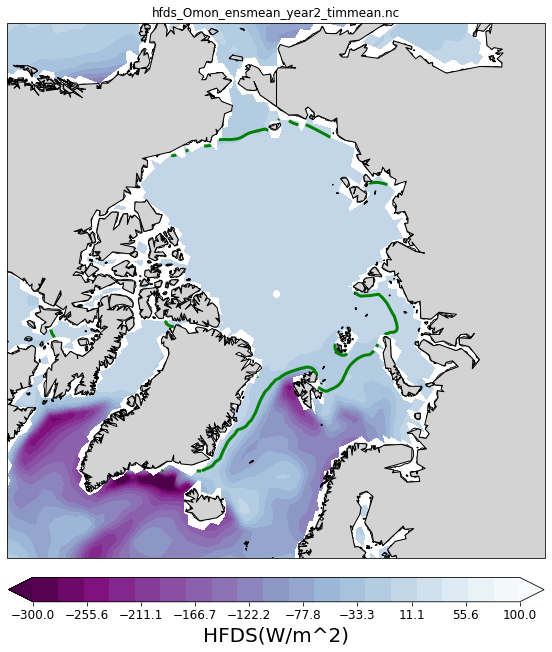

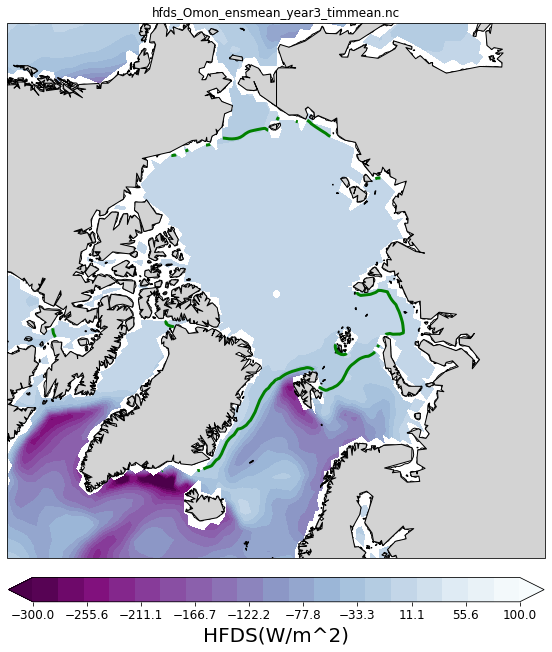

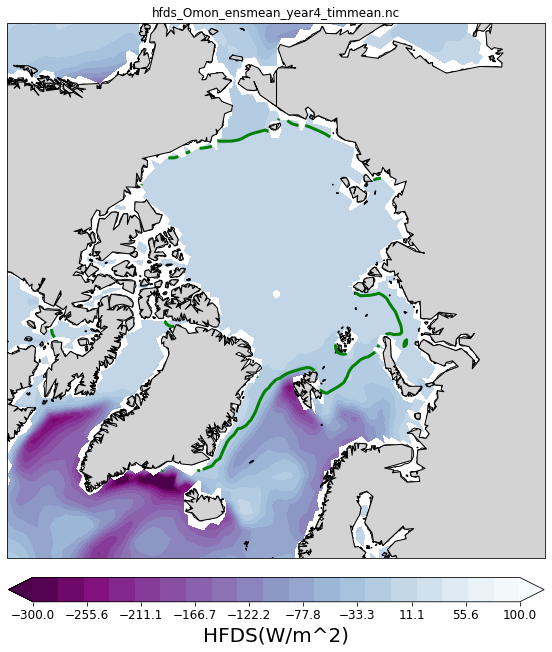

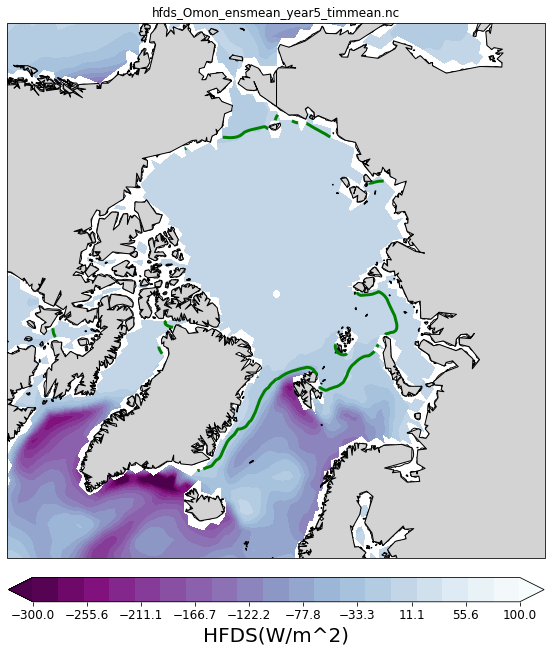

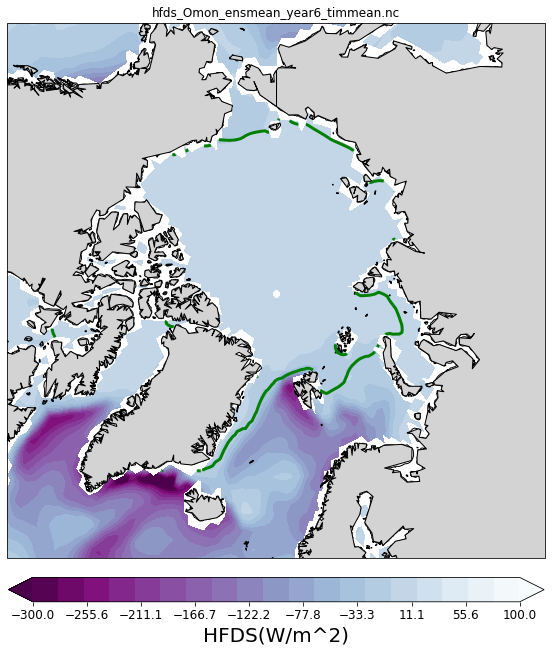

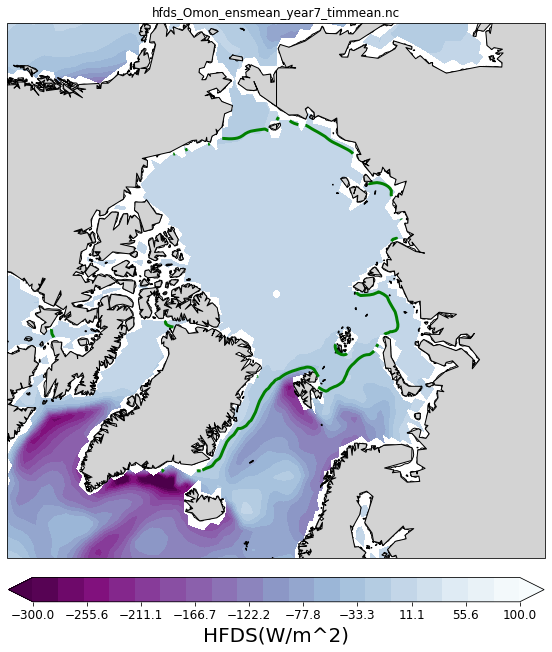

In [ ]:
path='D:/TRABAJO/DATA/NORcpm/hindcast/hfds/Ensemble_mean/'
pathi='D:/TRABAJO/DATA/NORcpm/hindcast/siconc/Ensmean/'
for j in range(2,12):
    filename= 'hfds_Omon_ensmean_year'+str(j)+'_timmean.nc'
    fileice='siconc_SImon_ensmean_year'+str(j)+'_timmean.nc'
        
    fl= Dataset(path+filename)
    lat = fl.variables['lat'][:]
    lon = fl.variables['lon'][:]
    st  = fl.variables['hfds'][:]
    air=np.squeeze(st)
     
    fli= Dataset(pathi+fileice)
    sti = fli.variables['siconc'][:]
    icec= np.squeeze(sti)
       
        
    air_cyc, lon_cyc = add_cyclic_point(air, coord=lon)
    ice_cyc, lon_cyc = add_cyclic_point(icec, coord=lon)
        
    lon2d, lat2d = np.meshgrid(lon_cyc, lat)
        
    plt.figure(figsize=(12,12))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines(resolution = '50m')
    ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray"))
    image= ax.contourf(lon2d, lat2d, air_cyc, transform=ccrs.PlateCarree(),
                           levels=np.linspace(-300,100,20),
                           cmap=cm.BuPu_r,
                           extend='both')
   
    image3=ax.contour(lon2d, lat2d, ice_cyc, transform=ccrs.PlateCarree(),
                           levels=np.linspace(90,90,1),
                           colors='g',
                           origin='lower',linewidths=3)
    
    cb = plt.colorbar(image,ticks=np.linspace(-300,100,10), orientation='horizontal', pad=0.03, shrink = 0.8)
    cb.ax.tick_params(labelsize=12)
    cb.set_label('HFDS'+'(W/m^2)', size=20)
    plt.title(filename)
    plt.savefig(path+'Figures/'+filename+'.png')

